<a href="https://colab.research.google.com/github/FranziskoB/Arvore_decisao/blob/main/Arvore_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio

Contexto do dados usados:
O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado “inafundável” RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Neste desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoa tem maior probabilidade de sobreviver?” usando os dados do passageiro (ou seja, nome, idade, sexo, classe socioeconômica, etc).

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

##Importando os dados

In [2]:
test = pd.read_csv("https://raw.githubusercontent.com/FranziskoB/Arvore_decisao/main/dados/test.csv", sep=";")
train = pd.read_csv("https://raw.githubusercontent.com/FranziskoB/Arvore_decisao/main/dados/train.csv")

## Visualizando os dados

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


#Lidando com missing values

In [5]:
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [6]:
train.Age.fillna(train.Age.mean(), inplace=True) # Substituindo NaA da idade por valores médios

In [7]:
test.Age.fillna(train.Age.mean(), inplace=True) # Substituindo NaA da idade por valores médios

In [8]:
train.Cabin.fillna("0",inplace=True)
test.Cabin.fillna("0",inplace=True)

In [9]:
train.loc[train.Cabin!="0",'Cabin']="1" # Substituindo os valores de quem tava presenta na cabine por 1
test.loc[test.Cabin!="0",'Cabin']="1" # Substituindo os valores de quem tava presenta na cabine por 1

## Influencia das variáveis na sobrevivencias dos passageiros

In [10]:
tmp=train

def descritiva(var):
    # Sumariza a taxa de sobreviventes por categoria da variável em análise
    tgc = tmp.groupby(var)['Survived'].agg(['mean', 'count', 'std']).reset_index()

    tgc.columns = [var, 'survived', 'N', 'se']
    tgc['se']=tgc['se']/np.sqrt(tgc['N'])
    plt.figure(figsize=(10, 6))
    N_total=tgc.N.sum()
    # Plota o gráfico de barras com as frequências
    sns.barplot(data=tgc, x=tgc.index, y=tgc.N/N_total,
                estimator=lambda x: np.sum(x) ,
                errorbar=None, color='blue', label='Frequencia relativa')

    # Plota as barras de erro
    plt.errorbar(x=tgc.index, y=tgc['survived'],
                 yerr=tgc['se'], fmt='none', color='black', capsize=5)

    # Plota as médias de cada grupo
    plt.scatter(x=tgc.index, y=tgc['survived'], color='red', marker='o', label='Taxa de sobrevivencia')

    # Plota as linhas que conectam as médias
    plt.plot(tgc.index, tgc['survived'], color='red', linestyle='--')

    # Estética do gráfico
    plt.xlabel(var)
    plt.ylabel('Taxa de sobreviventes e frenquencia relativa')
    plt.title('Análise descritiva')
    plt.legend()
    plt.xticks(ticks=range(len(tgc[var])), labels=tgc[var], rotation=45)

    # Mostra o gráfico
    plt.show()

In [11]:
tmp=train
def descritiva2(var):
    # Sumariza a taxa de sobreviventes por categoria da variável em análise
    tgc = tmp.groupby(var)['Survived'].agg(['mean', 'count', 'std']).reset_index()

    tgc.columns = [var, 'survived', 'N', 'se']
    tgc['se']=tgc['se']/np.sqrt(tgc['N'])
    plt.figure(figsize=(10, 6))

    N_total=tgc.N.sum()
    # Plota o gráfico de barras com as frequências
    sns.barplot(data=tgc, x=tgc.index, y=tgc.N/N_total,
                estimator=lambda x: np.sum(x) ,
                errorbar=None, color='blue', label='Frequencia relativa')

    # Plota as barras de erro
    plt.errorbar(x=tgc.index, y=tgc['survived'],
                 yerr=tgc['se'], fmt='none', color='black', capsize=5)

    # Plota as médias de cada grupo
    plt.scatter(x=tgc.index, y=tgc['survived'], color='red', marker='o', label='Taxa de sobrevivencia')

    # Plota as linhas que conectam as médias
    plt.plot(tgc.index, tgc['survived'], color='red', linestyle='--')

    # Estética do gráfico
    plt.xlabel(var)
    plt.ylabel('Taxa de sobreviventes e frenquencia relativa')
    plt.title('Análise descritiva')
    plt.legend()

    # Mostra o gráfico
    plt.show()

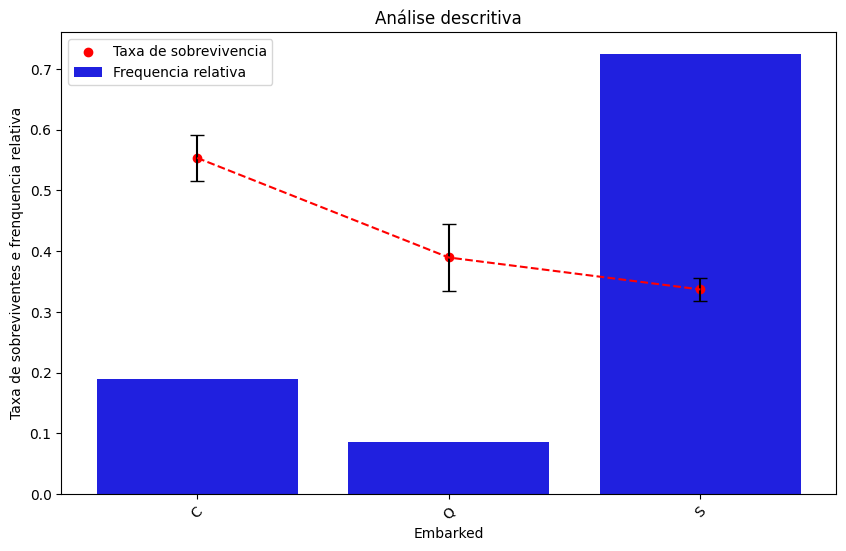

In [12]:
descritiva('Embarked')

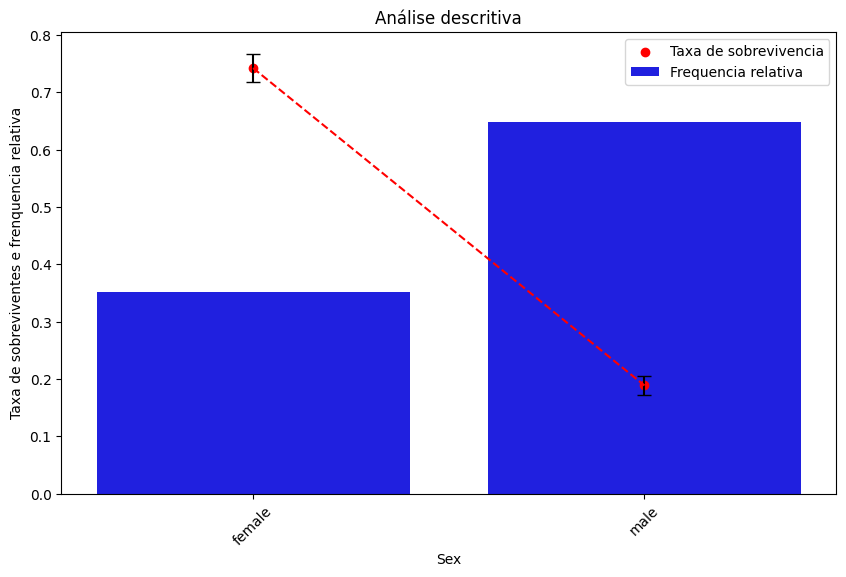

In [13]:
descritiva('Sex')

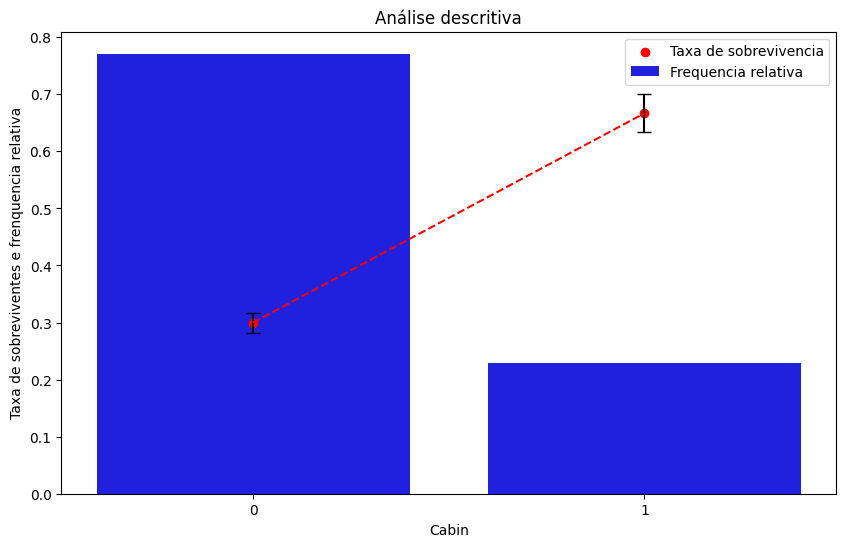

In [14]:
descritiva2('Cabin')

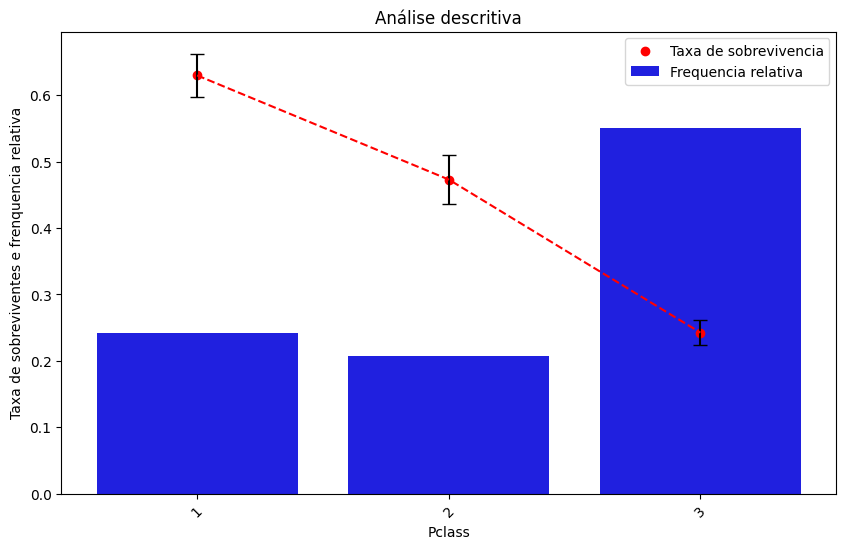

In [15]:
descritiva('Pclass')

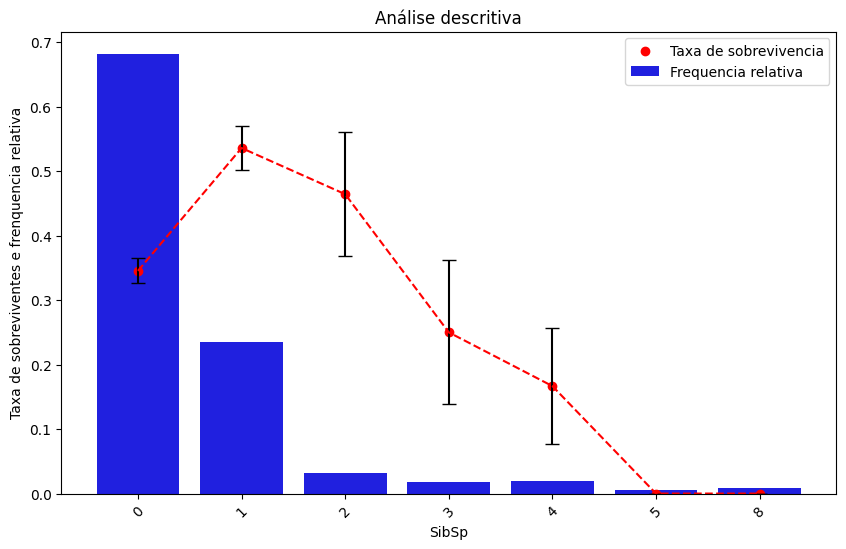

In [16]:
descritiva('SibSp')

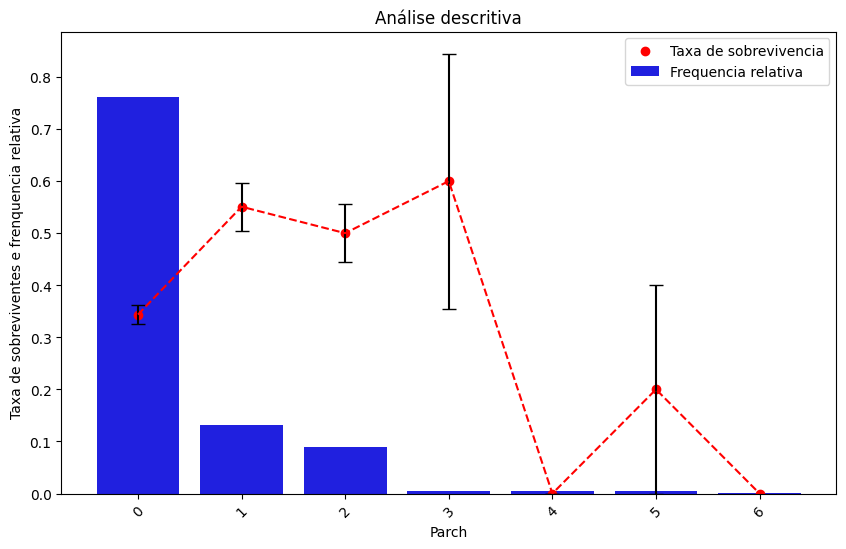

In [17]:
descritiva('Parch')

In [18]:
train['ageGroup']=pd.cut(

   train['Age'],

   bins=[0, 13, 19, 61, sys.maxsize],

   labels=['<12', 'Adolecente', 'Adulto', 'Idoso']

)

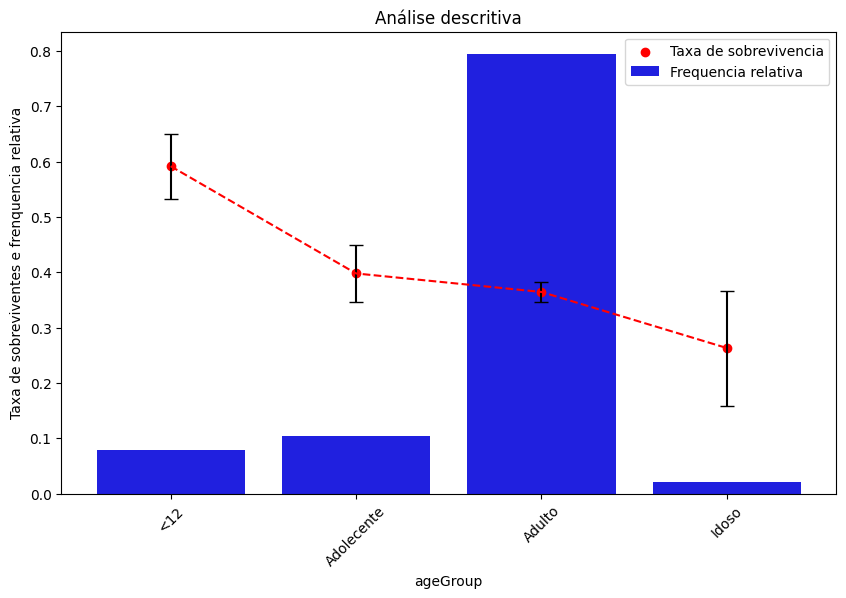

In [19]:
descritiva('ageGroup')

In [20]:
train['FareGroup']=pd.cut(
   train['Fare'],
   bins=10)

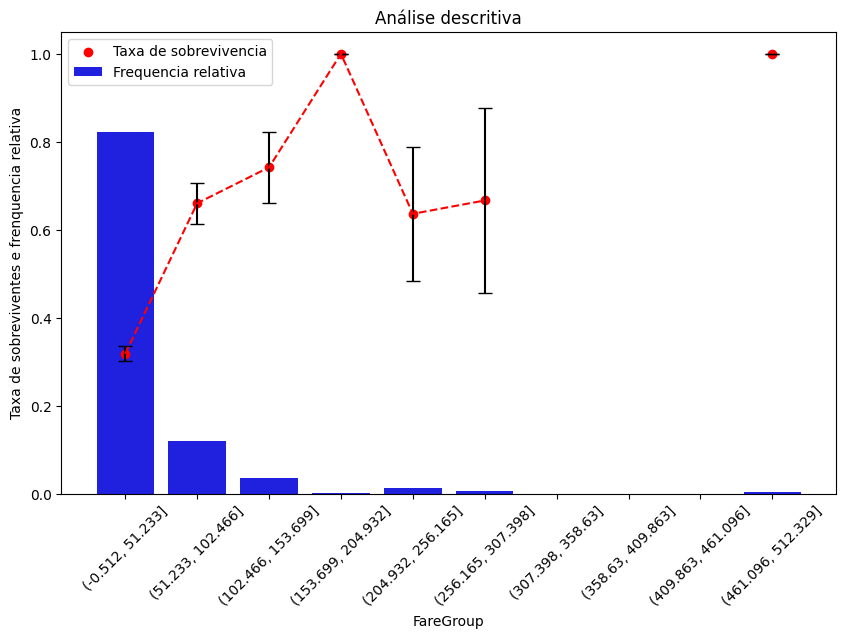

In [21]:
descritiva('FareGroup')

## Criando o modelo de árvore de decisão simples

In [22]:
test.dropna(inplace=True)

In [23]:
train.loc[train.Sex=="male",'Sex']=1 # Substituindo os valores de homens por 1
train.loc[train.Sex=="female",'Sex']=0 # Substituindo os valores de mulheres por 0
test.loc[test.Sex=="male",'Sex']=1 # Substituindo os valores de homens por 1
test.loc[test.Sex=="female",'Sex']=0 # Substituindo os valores de mulheres por 0

In [24]:
treino_x=train[['Age','Pclass','Sex','Fare','Cabin','Embarked','SibSp','Parch']]
teste_x=test[['Age','Pclass','Sex','Fare','Cabin','Embarked','SibSp','Parch']]

In [25]:
treino_x.Pclass=treino_x.Pclass.astype(str)
teste_x.Pclass=teste_x.Pclass.astype(str)

<ipython-input-25-718a2f2afbca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino_x.Pclass=treino_x.Pclass.astype(str)
<ipython-input-25-718a2f2afbca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste_x.Pclass=teste_x.Pclass.astype(str)


In [26]:
import statsmodels.formula.api as smf

Criando colunas de Dummies para as variáveis categóricas

In [27]:
treino_x = pd.get_dummies(data=treino_x, columns=['Pclass'])
treino_x = pd.get_dummies(data=treino_x, columns=['Embarked'])
teste_x = pd.get_dummies(data=teste_x, columns=['Pclass'])
teste_x = pd.get_dummies(data=teste_x, columns=['Embarked'])

In [28]:
treino_y=train[['Survived']]
teste_y=test[['Survived']]

Definindo o 1º modelo de treino

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


A acurácia foi 89.93%


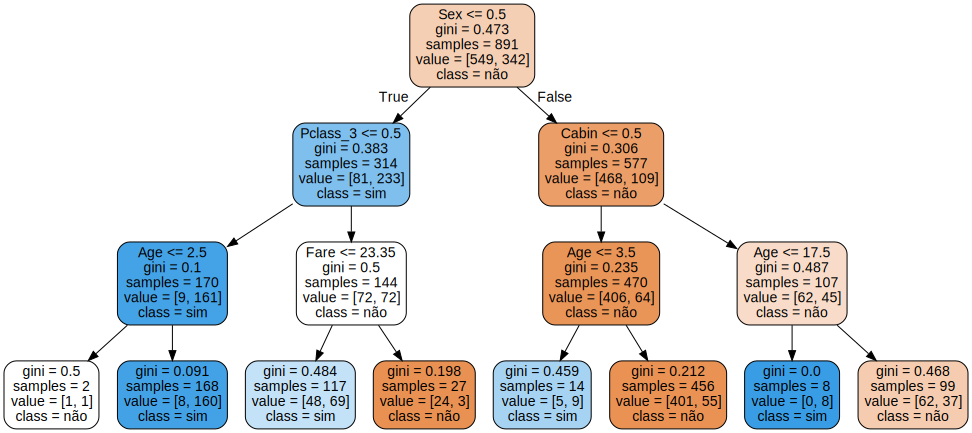

In [30]:
from sklearn.tree import export_graphviz
import graphviz

features = treino_x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

## Otimização por hiperparametros


Utilizando a validação cruzada por K-fold estratificado

In [31]:
def imprime_resultados(results):
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()
  print("Accuracy médio: %.2f" % (media * 100))
  print("Accuracy intervalo: [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
SEED = 301
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo,treino_x, treino_y, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 81.48
Accuracy intervalo: [73.95, 89.01]


Será utilizado um pipeline para sequenciar as tranformações na base de dados

1- Padronização dos dados

2- Definição do modelo

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
dec_tree = DecisionTreeClassifier()

In [34]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('dec_tree', dec_tree)])

In [43]:
criterion = ['gini', 'entropy']#Criterios de avaliação
max_depth = [2,3,4,6,8,10,12,14,16]#Variação da arvore de decisão

In [44]:
parameters = dict(dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [45]:
clf_GS = GridSearchCV(pipe, parameters,cv=10)
clf_GS.fit(treino_x, treino_y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 3, 4, 6, 8, 10, 12, 14,
                                                 16]})

In [46]:
print('Melhor critério:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Melhor max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Melhor critério: gini
Melhor max_depth: 3

DecisionTreeClassifier(max_depth=3)


Com as melhores configurações escolhidas, vamos realizar o fit do modelo

In [47]:
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=10)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 84.89%


Matriz de confunsão

In [48]:
labels=['Sim','Não']

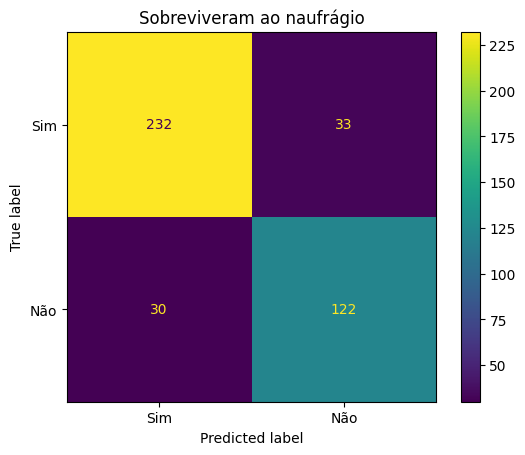

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(teste_y, previsoes), display_labels=labels).plot()
plt.grid(False)
plt.title("Sobreviveram ao naufrágio")
plt.show()